# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Alfredo Romo Osorno

- ID: A01643235

- My carreer: IRS


# Importing libraries

In [98]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Import SciKit Learn for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [34]:
path_to_csv : str = "../../Evidencia/A01643235_X.csv"

df = pd.read_csv(path_to_csv)
df = df.drop(columns=df.columns[0]) # First column is the index, so we dont need it

## b) Data managment


Print the first 7 rows

In [35]:
df.head(7)

x1         x2        x3        x4        x5        x6        x7  \
0  1.154127  -8.882389  1.099829 -2.674929 -8.924625  0.925651  3.633215   
1  8.056461   4.591475 -3.989315 -7.973479 -6.016808  4.613683 -5.339754   
2  2.145511  11.248670 -5.092522 -0.484979 -1.261308  1.839213 -0.330701   
3  5.452597   3.089564 -2.079192 -8.798266 -7.251580  4.673807 -3.065162   
4  8.769777  -2.786486 -9.831175  6.148702  1.051255 -4.312232  4.439431   
5 -1.609486   9.151588 -2.235650 -1.018719 -0.842080 -2.527663 -0.124695   
6  4.843019  -1.195982 -9.092394  8.873648  0.596072 -2.508857  5.796141   

          x8  
0  -7.770017  
1  -7.019981  
2   9.958546  
3  -3.127617  
4  -7.797510  
5  10.374347  
6 -10.811726

Print the last 4 rows

In [36]:
df.tail(4)

x1         x2         x3         x4        x5        x6        x7  \
937  4.254538  -2.296723  -7.817766   7.783750  3.340783 -7.283320  7.323327   
938  3.897489  -4.300962 -10.275101  12.515585  2.727595 -4.318335  5.200689   
939  1.192185   9.318043  -2.796337  -3.448527 -2.934755  0.227814 -0.247045   
940  9.688786  11.161399   0.388068  -4.868937 -2.984834  3.106981 -4.073936   

            x8  
937  -7.658576  
938  -9.313044  
939  10.674857  
940  -2.093294

How many rows and columns are in your data?

Use the `shape` method


In [37]:
rows, cols = df.shape

print(f"Rows: {rows} | Columns: {cols}")

Rows: 941 | Columns: 8


Print the name of all columns

Use the `columns` method

In [38]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [39]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
x8    float64
dtype: object

What is the meaning of rows and columns?

Your responses here

In this case, each column represents data of an unknown source, most likely sensor readings, as they are float values ranging form -15 to 15, They may also be financial data like stock market differences or audio signals

Each row has the data of its corresponding column (so far, unknown) 

...

Print a statistical summary of your columns


In [40]:
df.describe()

x1          x2          x3          x4          x5          x6  \
count  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000   
mean     1.893544    0.446143    0.254152   -0.880164   -4.044416   -0.921307   
std      5.504311    6.847794    6.847492    7.555328    5.059226    4.171289   
min    -12.627142  -14.740638  -13.998974  -13.515584  -15.818757  -10.042417   
25%     -0.590756   -3.717130   -5.006147   -7.266744   -8.153460   -3.991425   
50%      2.872557   -0.766841   -1.051974   -3.163537   -4.662872   -1.349703   
75%      6.126187    7.075788    7.300966    7.556528    0.486690    1.559545   
max     11.733027   15.180251   14.914601   15.815824    7.413936   10.657090   

               x7          x8  
count  941.000000  941.000000  
mean     0.346448   -0.937881  
std      4.049814    7.163408  
min     -9.250013  -13.706002  
25%     -2.656382   -6.974402  
50%      0.523530   -3.220987  
75%      3.097426    6.885098  
max     11.876361   13.749051

1. What is the minumum and maximum values of each variable:
- x1: -12.627142 | 11.733027
- x2: -14.740638 | 15.180251
- x3: -13.998974 | 14.914601
- x4: -13.515584 | 15.815824
- x5: -15.818757 | 7.413936
- x6: -10.042417 | 10.657090
- x7: -9.250013	 | 11.876361
- x8: -13.706002 |13.749051

2. What is the mean and standar deviation of each variable:

- x1: 1.893544  | 5.504311
- x2: 0.446143  | 6.847794	
- x3: 0.254152  | 6.847492	
- x4: -0.880164	| 7.555328
- x5: -4.044416	| 5.059226
- x6: -0.921307 | 4.171289	
- x7: 0.346448	| 4.049814
- x8: -0.937881 | 7.163408


3. What the 25%, 50% and 75% represent?:
- Indicates that 25,50 or 75% of the data points are less than or equal to this value.

Rename the columns using the same name with capital letters

In [41]:
# Rename columns to uppercase
df.columns = df.columns.str.upper()

Rename the columns to their original names

In [42]:
# Rename columns to uppercase
df.columns = df.columns.str.lower()
df

x1         x2         x3         x4        x5        x6        x7  \
0    1.154127  -8.882389   1.099829  -2.674929 -8.924625  0.925651  3.633215   
1    8.056461   4.591475  -3.989315  -7.973479 -6.016808  4.613683 -5.339754   
2    2.145511  11.248670  -5.092522  -0.484979 -1.261308  1.839213 -0.330701   
3    5.452597   3.089564  -2.079192  -8.798266 -7.251580  4.673807 -3.065162   
4    8.769777  -2.786486  -9.831175   6.148702  1.051255 -4.312232  4.439431   
..        ...        ...        ...        ...       ...       ...       ...   
936  5.345238   0.383703  10.476832  10.276221 -5.215278 -3.223002 -1.479396   
937  4.254538  -2.296723  -7.817766   7.783750  3.340783 -7.283320  7.323327   
938  3.897489  -4.300962 -10.275101  12.515585  2.727595 -4.318335  5.200689   
939  1.192185   9.318043  -2.796337  -3.448527 -2.934755  0.227814 -0.247045   
940  9.688786  11.161399   0.388068  -4.868937 -2.984834  3.106981 -4.073936   

            x8  
0    -7.770017  
1    -7.019981  
2     9.958546  
3    -3.127617  
4    -7.797510  
..         ...  
936  -2.389349  
937  -7.658576  
938  -9.313044  
939  10.674857  
940  -2.093294  

[941 rows x 8 columns]

Use two different alternatives to get one of the columns

In [43]:
# Bracket notation
print(df['x2'])

# Dot notation
print(df.x2)

0      -8.882389
1       4.591475
2      11.248670
3       3.089564
4      -2.786486
         ...    
936     0.383703
937    -2.296723
938    -4.300962
939     9.318043
940    11.161399
Name: x2, Length: 941, dtype: float64
0      -8.882389
1       4.591475
2      11.248670
3       3.089564
4      -2.786486
         ...    
936     0.383703
937    -2.296723
938    -4.300962
939     9.318043
940    11.161399
Name: x2, Length: 941, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [44]:
# Get rows 62 to 72 and columns 2 and 3 (zero-indexed)
subset_loc = df.loc[62:72, ['x2', 'x3']]
print(subset_loc)

           x2        x3
62 -10.861258 -3.448683
63  -0.448425  9.557189
64  -2.234615  7.644560
65 -11.791281  1.873404
66  -1.952565  9.824141
67 -11.810807 -0.412374
68  -0.697669  7.594204
69  -1.372247 -5.951846
70  -1.753518 -6.332821
71  -2.774195 -6.013388
72   8.959460 -2.801492


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [45]:
# Select second and third columns
subset = df[['x2', 'x3']]

# Count null and not null values for each column
null_counts = subset.isnull().sum()
not_null_counts = subset.notnull().sum()

# Print results
print("Null values:\n", null_counts)
print("\nNot null values:\n", not_null_counts)

Null values:
 x2    0
x3    0
dtype: int64

Not null values:
 x2    941
x3    941
dtype: int64


Discard the last column


In [46]:
df_dropped = df.drop(columns=df.columns[-1])

print(df_dropped.head())


         x1         x2        x3        x4        x5        x6        x7
0  1.154127  -8.882389  1.099829 -2.674929 -8.924625  0.925651  3.633215
1  8.056461   4.591475 -3.989315 -7.973479 -6.016808  4.613683 -5.339754
2  2.145511  11.248670 -5.092522 -0.484979 -1.261308  1.839213 -0.330701
3  5.452597   3.089564 -2.079192 -8.798266 -7.251580  4.673807 -3.065162
4  8.769777  -2.786486 -9.831175  6.148702  1.051255 -4.312232  4.439431


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:




## c) Data visualization

Plot in the histogram of one of the variables

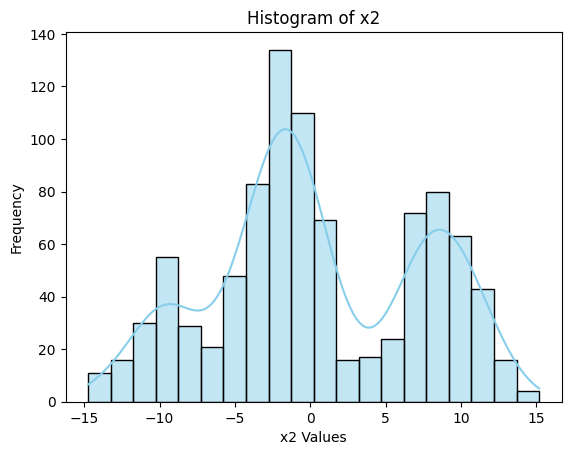

In [47]:
# Plot histogram of one of the variables (e.g., 'x2')
sns.histplot(df['x2'], kde=True, bins=20, color='skyblue')

# Add labels and title
plt.xlabel('x2 Values')
plt.ylabel('Frequency')
plt.title('Histogram of x2')

# Show plot
plt.show()

Plot in the same figure the histogram of two variables



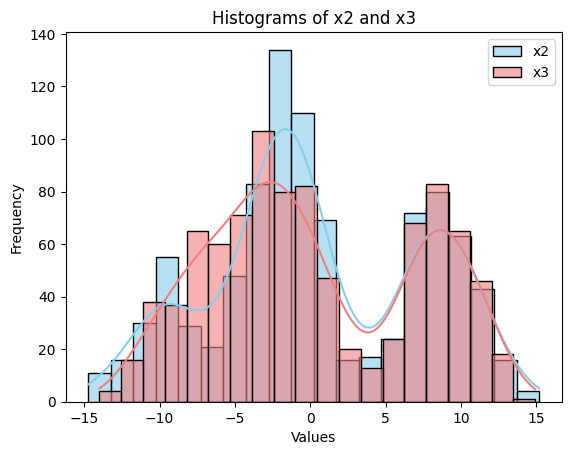

In [48]:
sns.histplot(df['x2'], kde=True, color='skyblue', label='x2', bins=20, alpha=0.6)
sns.histplot(df['x3'], kde=True, color='lightcoral', label='x3', bins=20, alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of x2 and x3')
plt.legend()

# Show plot
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

<Axes: xlabel='x2'>

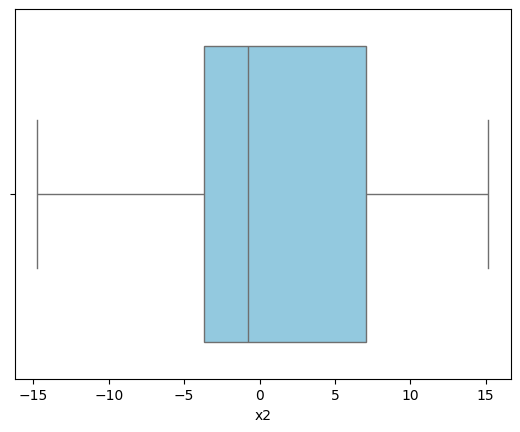

In [49]:
sns.boxplot(x=df['x2'], color='skyblue')

Plot in the same figure the boxplot of two variables

/tmp/ipykernel_8178/2908362704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=['skyblue', 'lightcoral'])


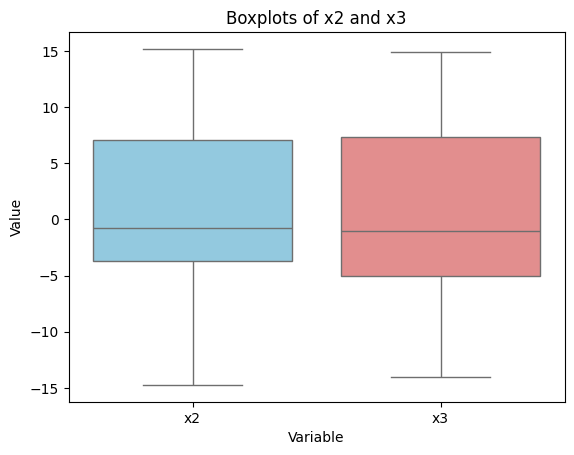

In [50]:
# Create a DataFrame with selected columns in long format for plotting
df_melted = pd.melt(df, value_vars=['x2', 'x3'], var_name='Variable', value_name='Value')

# Plot the boxplots
sns.boxplot(x='Variable', y='Value', data=df_melted, palette=['skyblue', 'lightcoral'])

# Add title
plt.title('Boxplots of x2 and x3')

# Show plot
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the scatter plot between all pair of variables

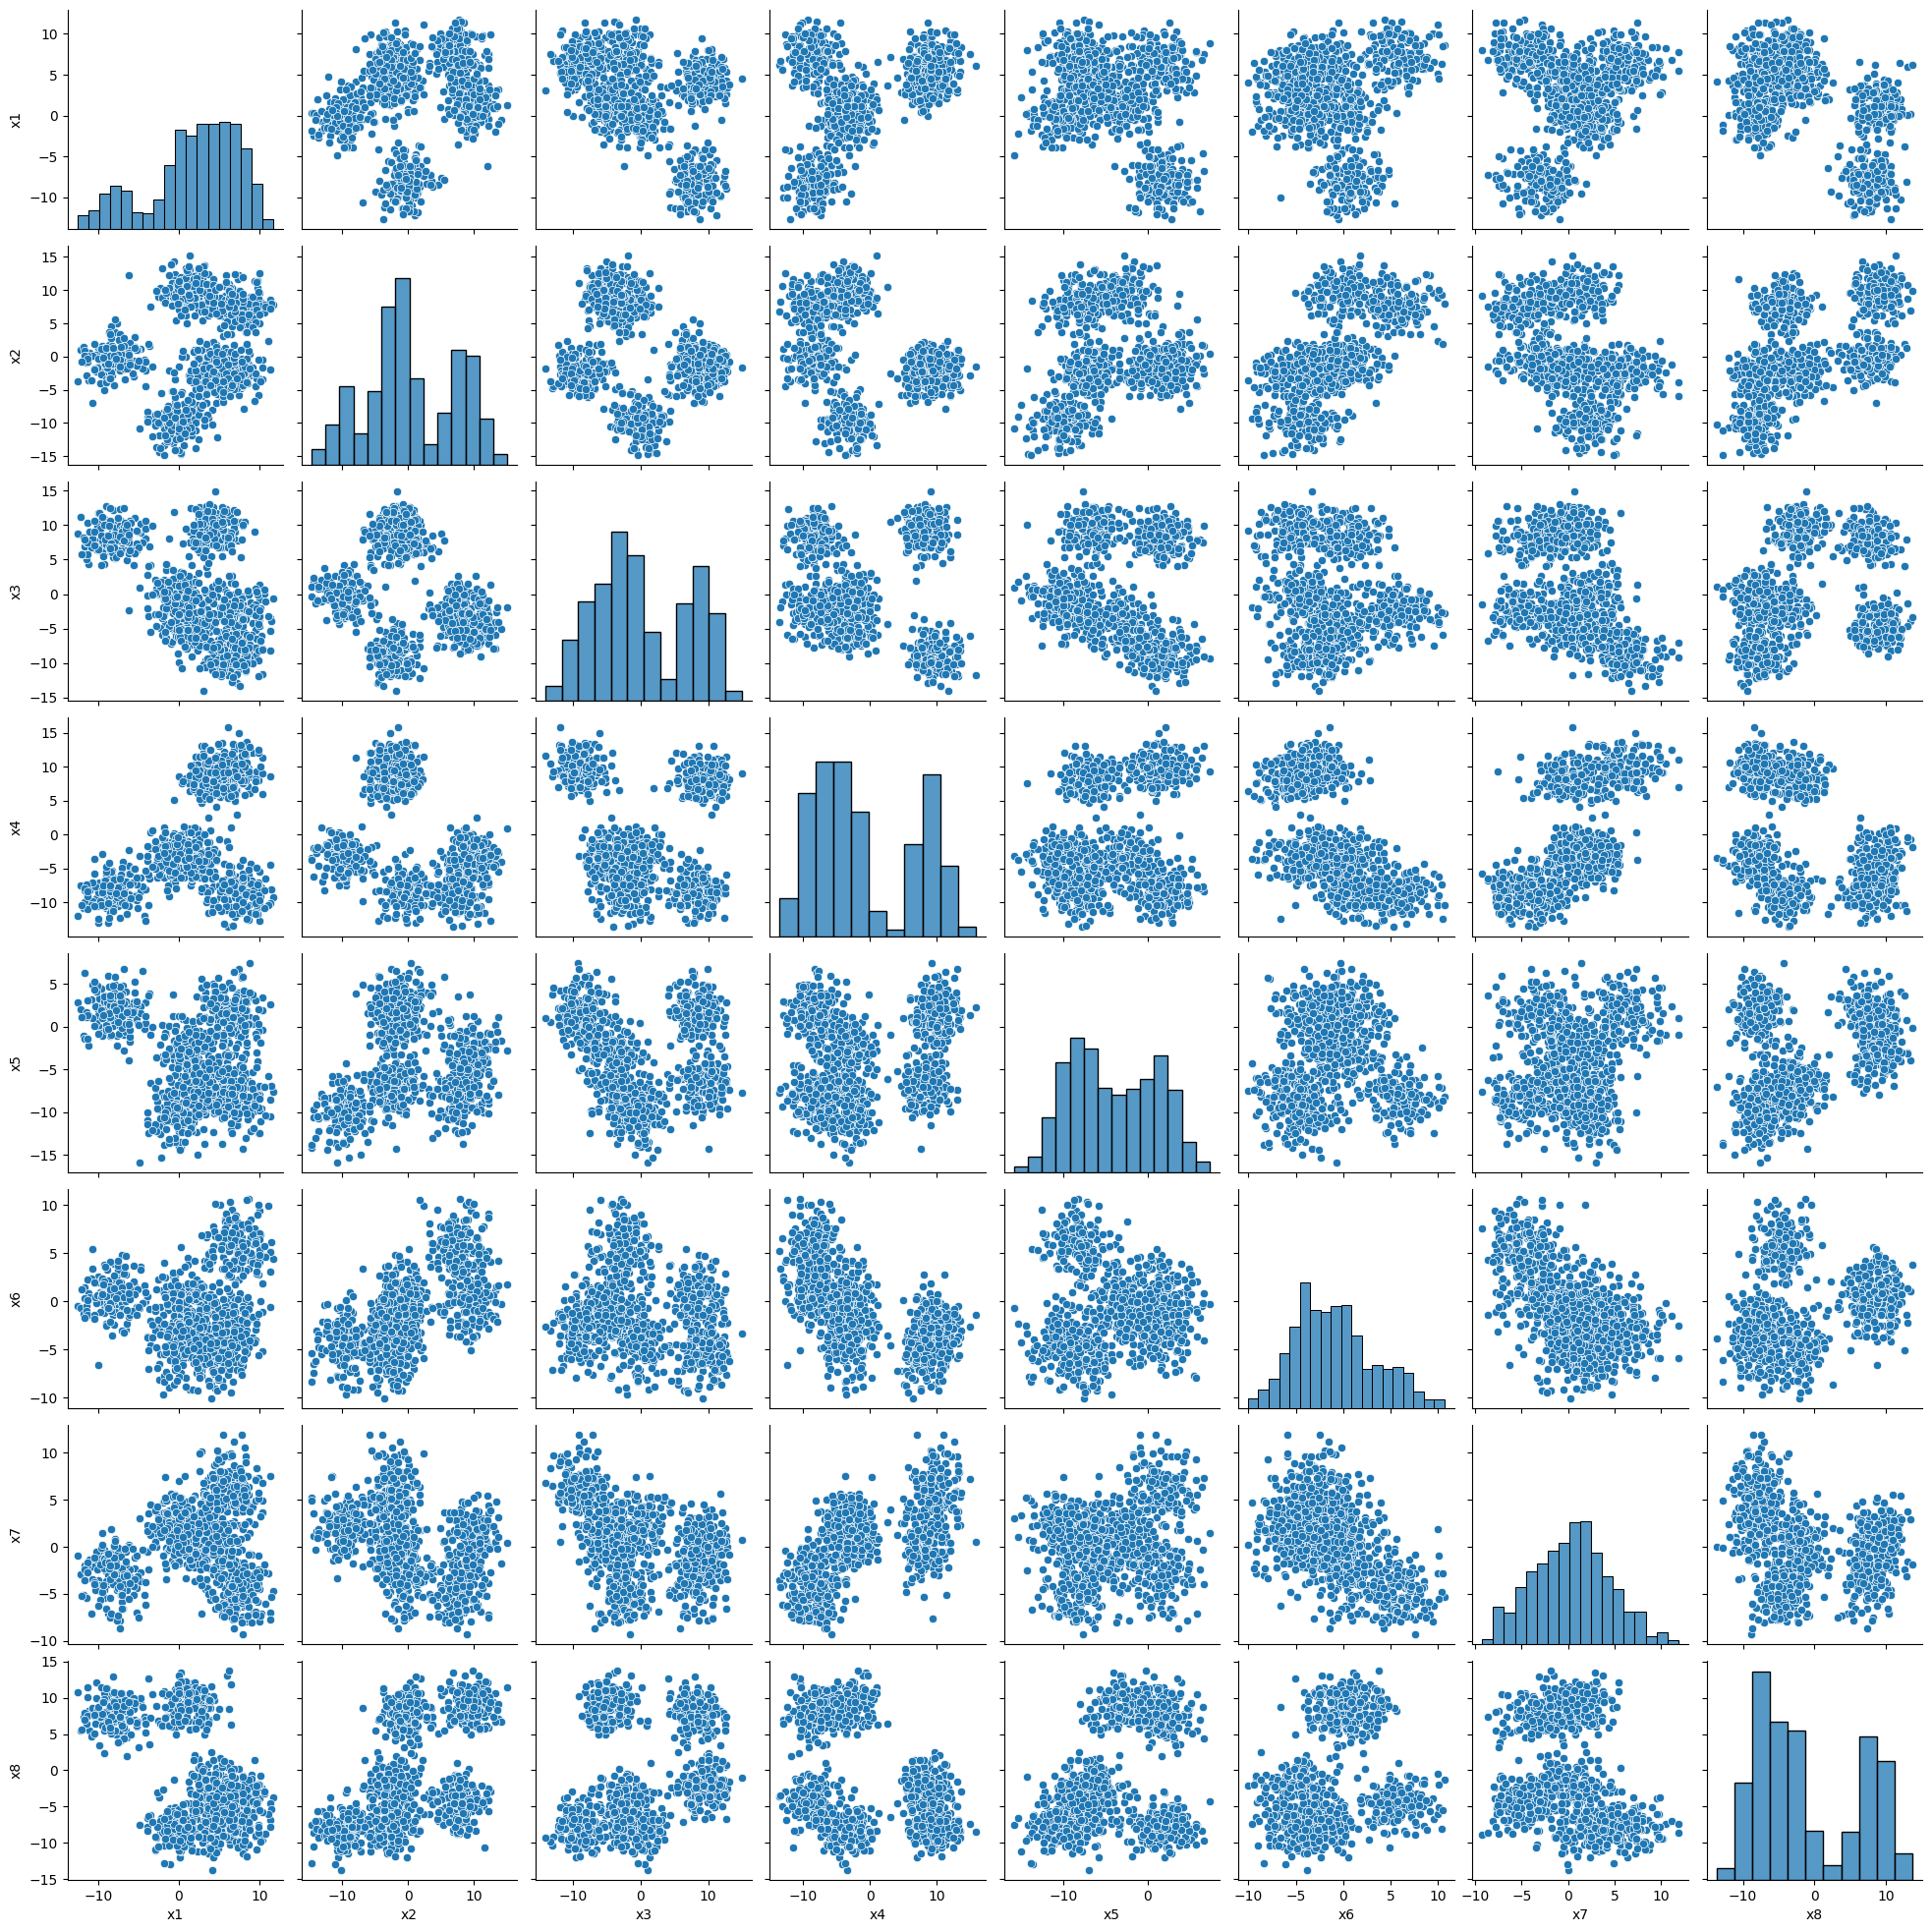

In [51]:
sns.pairplot(data=df)

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [54]:
# Perform KMeans clustering with 8 clusters as we have 8 columns
kmeans = KMeans(n_clusters=8, random_state=42)


Add to your dataset a column with the estimated cluster to each data point

In [62]:
df['Cluster'] = kmeans.fit_predict(df)

Print the number associated to each cluster

In [58]:
df.head(10)

x1         x2         x3        x4        x5        x6        x7  \
0  1.154127  -8.882389   1.099829 -2.674929 -8.924625  0.925651  3.633215   
1  8.056461   4.591475  -3.989315 -7.973479 -6.016808  4.613683 -5.339754   
2  2.145511  11.248670  -5.092522 -0.484979 -1.261308  1.839213 -0.330701   
3  5.452597   3.089564  -2.079192 -8.798266 -7.251580  4.673807 -3.065162   
4  8.769777  -2.786486  -9.831175  6.148702  1.051255 -4.312232  4.439431   
5 -1.609486   9.151588  -2.235650 -1.018719 -0.842080 -2.527663 -0.124695   
6  4.843019  -1.195982  -9.092394  8.873648  0.596072 -2.508857  5.796141   
7  5.091264  -2.589019  11.051170  5.499626 -7.980338 -3.581222  1.059328   
8  0.548821   6.472099  -3.901230 -2.665611  0.908413 -2.038870  1.079952   
9  0.362187  -5.408061  -2.748095 -5.437072 -8.829760 -0.888581  0.587314   

          x8  Cluster  
0  -7.770017        3  
1  -7.019981        4  
2   9.958546        2  
3  -3.127617        4  
4  -7.797510        1  
5  10.374347        2  
6 -10.811726        7  
7  -2.760750        5  
8  11.480414        2  
9  -6.321813        3

Print the centroids

In [61]:
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[-7.08292155e+00  4.95075691e-01  7.66897754e+00 -7.39133924e+00
   1.69955451e+00  8.03376304e-01 -2.53487675e+00  8.69652592e+00
  -2.66453526e-15]
 [ 6.45141221e+00 -2.29070205e+00 -8.79676371e+00  9.74493909e+00
   1.63615043e+00 -2.84344491e+00  6.10206585e+00 -7.63826832e+00
   1.00000000e+00]
 [ 1.22970255e+00  9.74152480e+00 -4.59863294e+00 -3.00191374e+00
  -2.83544932e+00  5.37898424e-02  1.22705221e+00  9.09810431e+00
   2.00000000e+00]
 [-6.74594039e-04 -9.73998138e+00 -1.78247773e-01 -3.26049253e+00
  -1.00644716e+01 -4.16157080e+00  2.21620905e+00 -8.06745856e+00
   3.00000000e+00]
 [ 6.81109133e+00  8.24469128e+00 -2.55138699e+00 -8.89943145e+00
  -6.97484994e+00  5.20220600e+00 -3.33644958e+00 -3.60033923e+00
   4.00000000e+00]
 [ 4.33429435e+00 -2.26222524e+00  9.24111803e+00  8.18380213e+00
  -6.79961015e+00 -4.97707799e+00  2.19955858e-01 -2.25258702e+00
   5.00000000e+00]
 [-8.79885042e+00 -1.20393732e+00  8.69903048e+00 -9.08158146e+00
   1.96709

Print the intertia metric

In [65]:
print(kmeans.inertia_)

29175.586301576717


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

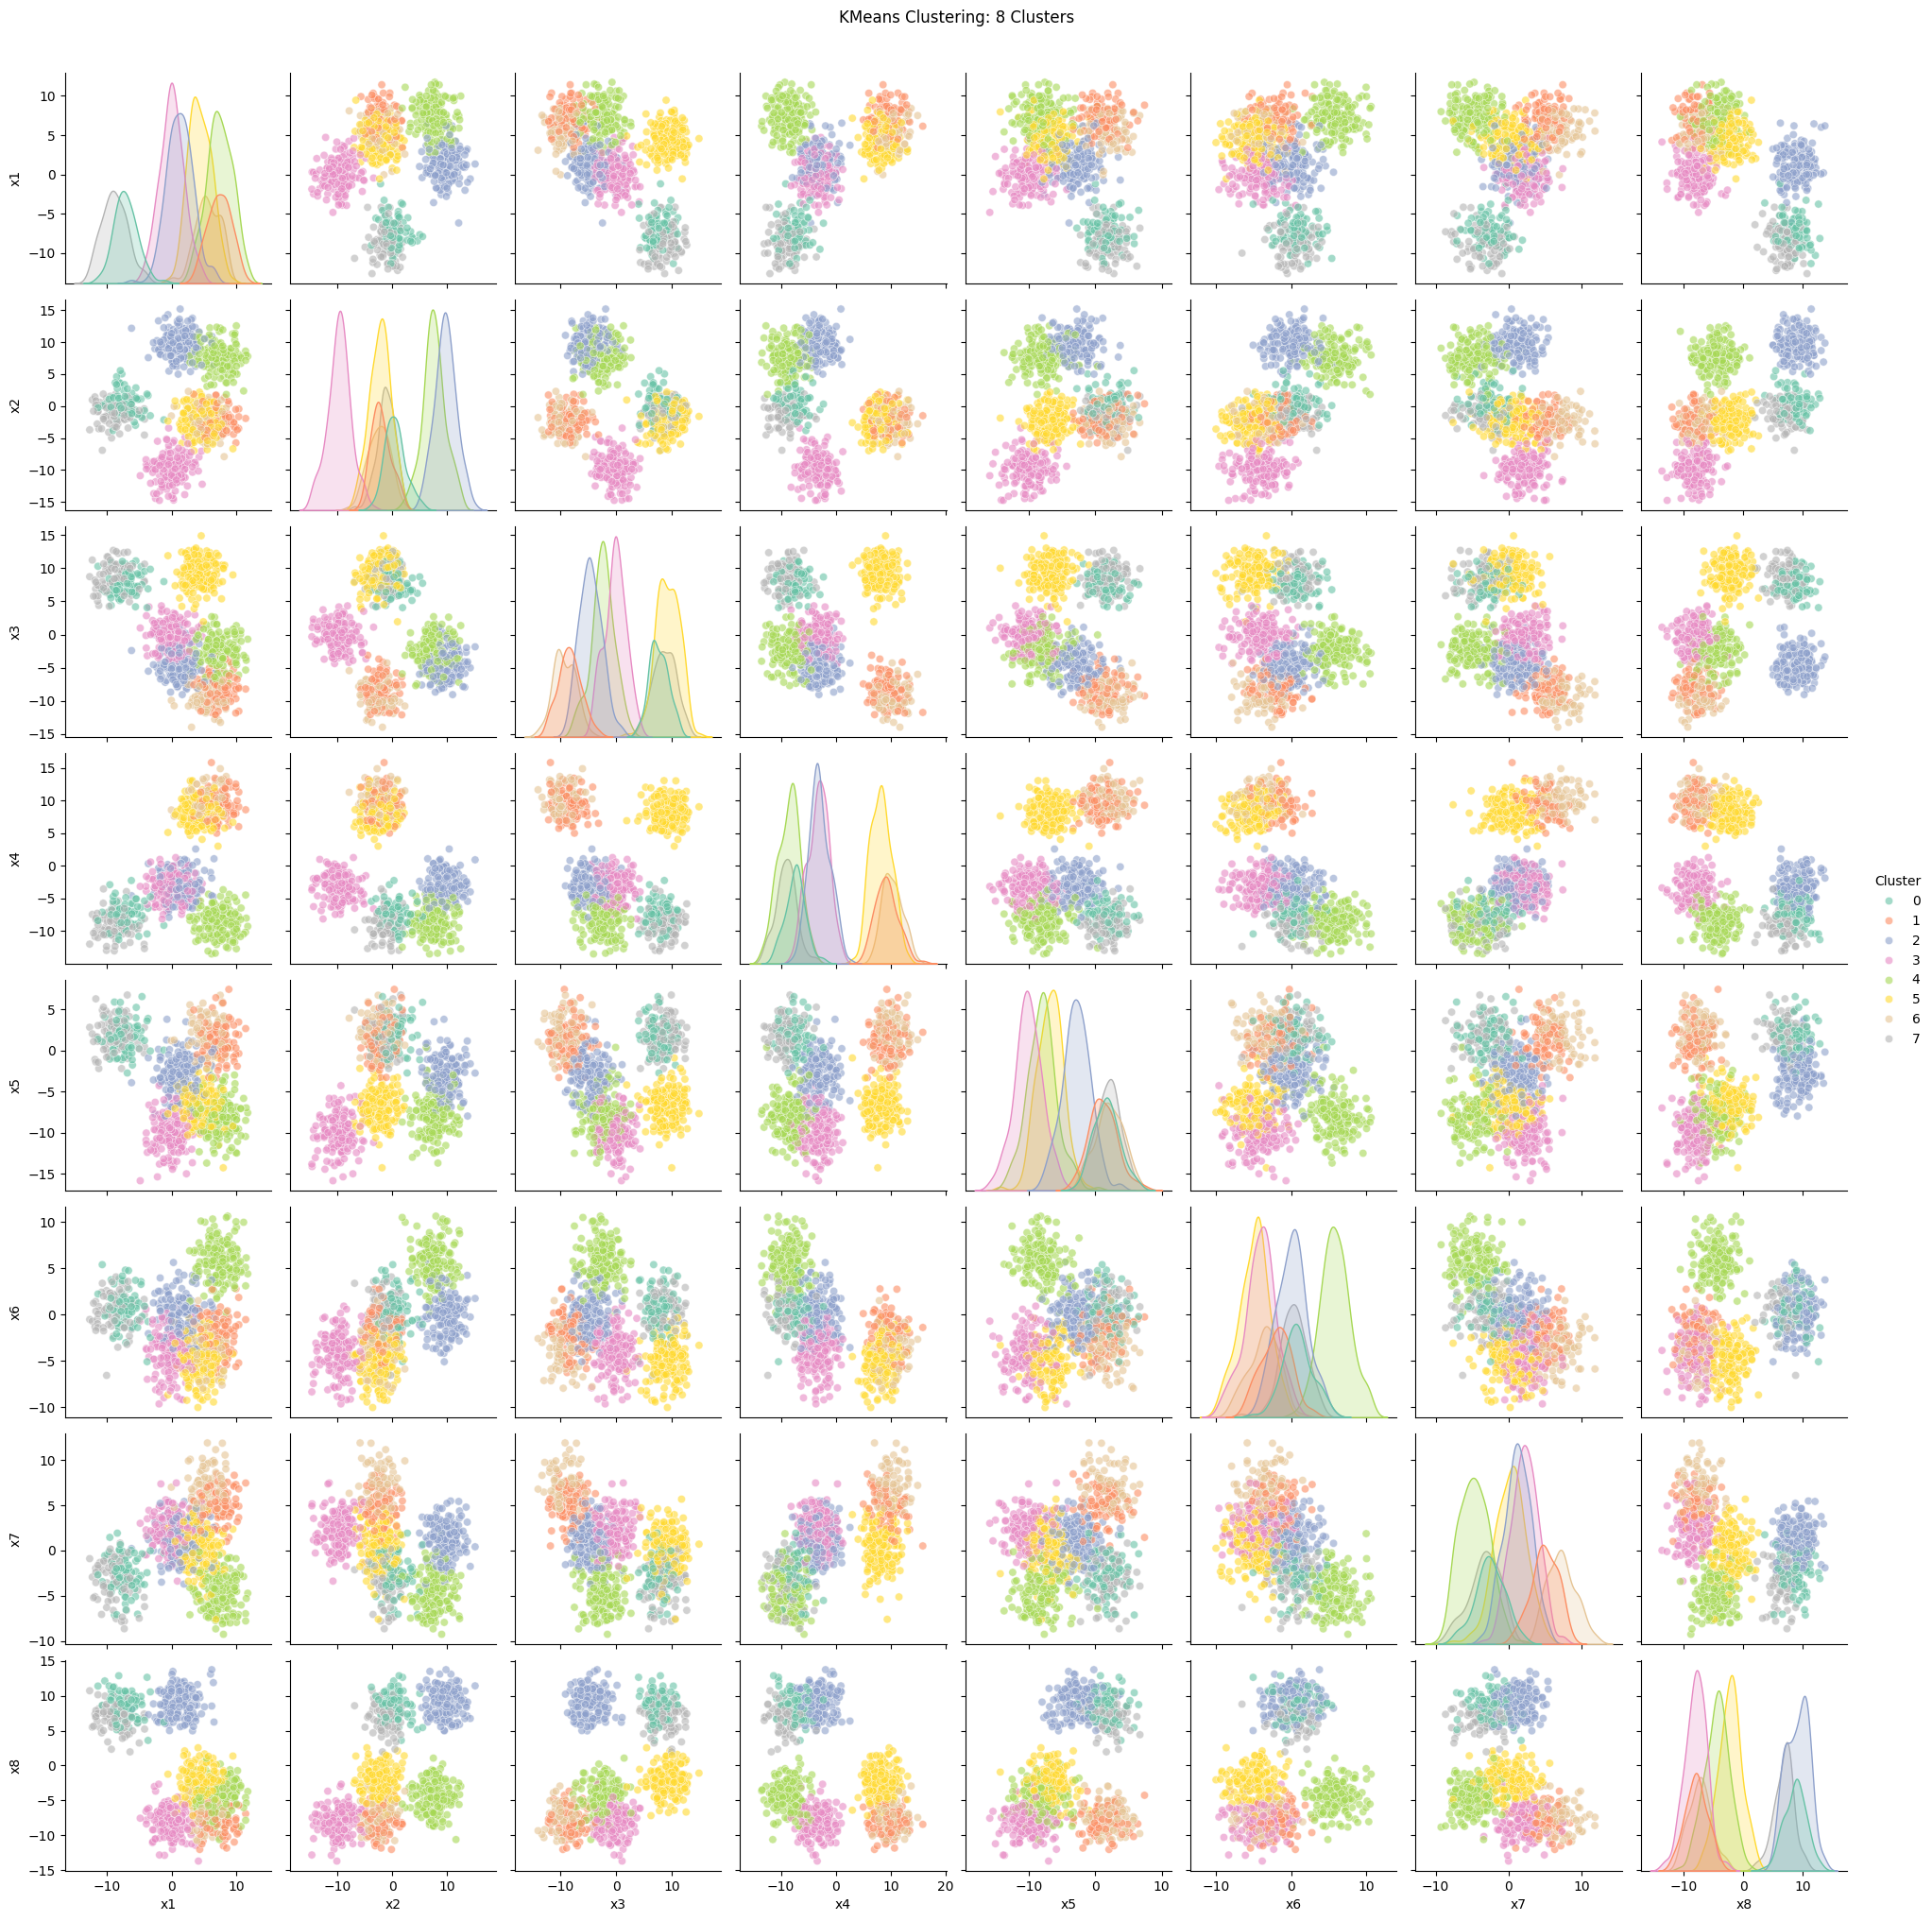

In [63]:
# Plot the scatter plot matrix with the cluster labels
sns.pairplot(df, hue='Cluster', palette='Set2', plot_kws={'alpha': 0.6})
plt.suptitle('KMeans Clustering: 8 Clusters', y=1.02)
plt.show()

### Questions

Provides a detailed description of your results

Your response:

## d) Elbow plot

Compute the Elbow plot

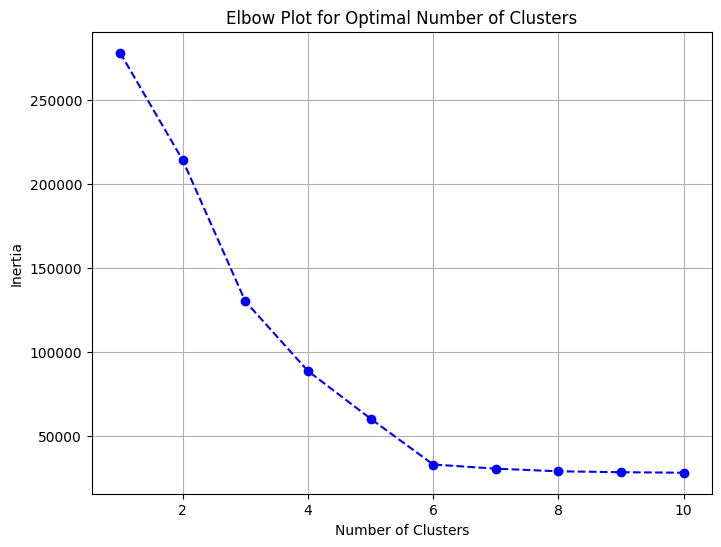

In [66]:
# Range of clusters to test
range_n_clusters = list(range(1, 11))

# List to store the inertia values for each k
inertia_values = []

# Loop to compute KMeans for each k and store the inertia
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia_values, marker='o', color='b', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
6


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
They don't match as my initial guess was 8, this may mean our data is not grouped correctly or we missinterpreted what it means (most likely as we don't know what this data it)



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [72]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()



2) Plot some of the observations (add in the title the label/digit of that obserbation)

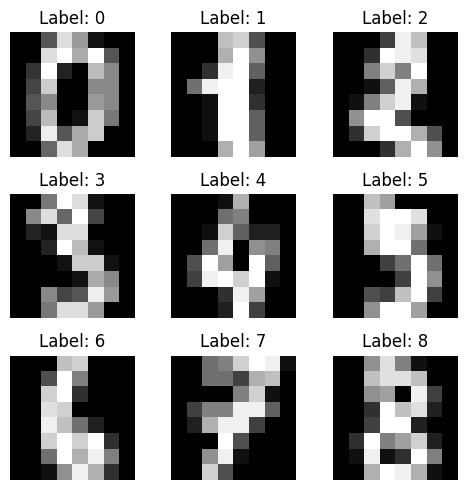

In [96]:
# Get the images (8x8 pixel values) and labels
images = digits.images
labels = digits.target

# Plot some of the observations
plt.figure(figsize=(5, 5))

# plot first 9 images
for i in range(9):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {labels[i]}")  # Add the label in the title
    plt.axis('off')  # Hide the axis
plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/features from the eighth row


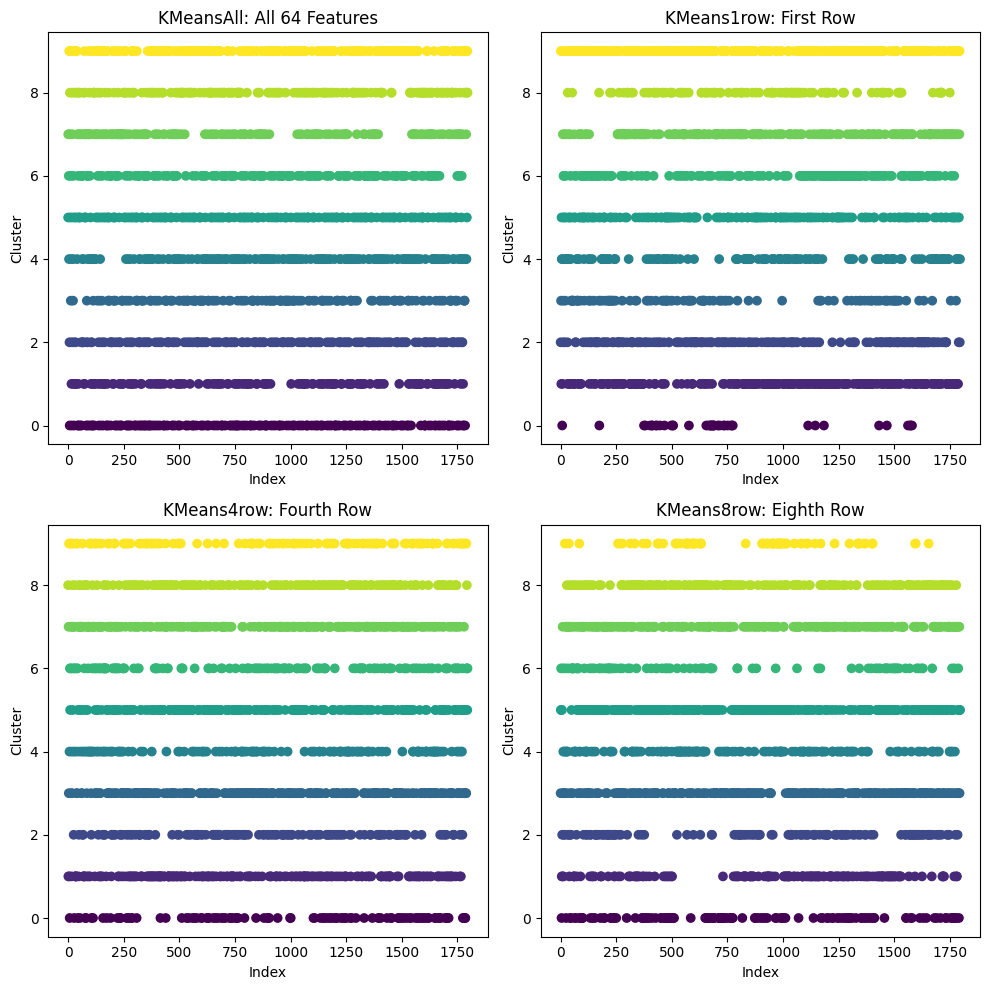

In [82]:
# Number of clusters to use for KMeans
n_clusters = 10

data = digits.data

# --- KMeansAll: Using all 64 features/pixels ---
kmeans_all = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_all.fit(data)
labels_all = kmeans_all.labels_

# --- KMeans1row: Using only the 8 pixels from the first row ---
data_1row = images[:, 0, :]  # Only first row of each 8x8 image (shape: 1797, 8)
kmeans_1row = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_1row.fit(data_1row)
labels_1row = kmeans_1row.labels_

# --- KMeans4row: Using only the 8 pixels from the fourth row ---
data_4row = images[:, 3, :]  # Only fourth row of each 8x8 image (shape: 1797, 8)
kmeans_4row = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_4row.fit(data_4row)
labels_4row = kmeans_4row.labels_

# --- KMeans8row: Using only the 8 pixels from the eighth row ---
data_8row = images[:, 7, :]  # Only eighth row of each 8x8 image (shape: 1797, 8)
kmeans_8row = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_8row.fit(data_8row)
labels_8row = kmeans_8row.labels_

# --- Plot Results for Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# KMeansAll visualization
axes[0, 0].scatter(range(len(labels_all)), labels_all, c=labels_all, cmap='viridis')
axes[0, 0].set_title('KMeansAll: All 64 Features')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Cluster')

# KMeans1row visualization
axes[0, 1].scatter(range(len(labels_1row)), labels_1row, c=labels_1row, cmap='viridis')
axes[0, 1].set_title('KMeans1row: First Row')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Cluster')

# KMeans4row visualization
axes[1, 0].scatter(range(len(labels_4row)), labels_4row, c=labels_4row, cmap='viridis')
axes[1, 0].set_title('KMeans4row: Fourth Row')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Cluster')

# KMeans8row visualization
axes[1, 1].scatter(range(len(labels_8row)), labels_8row, c=labels_8row, cmap='viridis')
axes[1, 1].set_title('KMeans8row: Eighth Row')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Cluster')

plt.tight_layout()
plt.show()


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

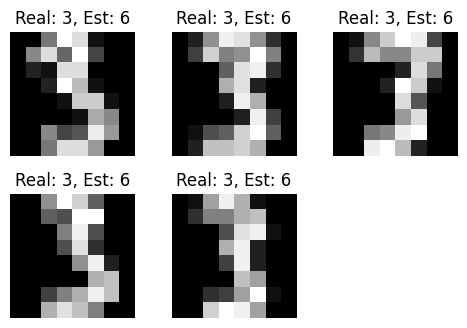

In [89]:
# Choose the digit you want to verify, e.g., digit 0
digit_to_check = 3

# Get the indices where the true label is the chosen digit
digit_indices = np.where(labels == digit_to_check)[0]

# Plot several observations from the same digit (in this case, digit 0)
plt.figure(figsize=(5, 5))

# We will plot 5 random observations of the chosen digit
for i in range(5):
    # Randomly choose an index of the digit
    idx = digit_indices[i]
    
    # Plot the image of the digit
    plt.subplot(3, 3, i+1)
    plt.imshow(images[idx], cmap='gray')
    
    # Get the real label (true digit) and the estimated label (from KMeans clustering)
    real_label = labels[idx]
    estimated_label = kmeans_all.labels_[idx]
    
    # Add title with real and estimated labels
    plt.title(f"Real: {real_label}, Est: {estimated_label}")
    plt.axis('off')  # Hide the axis for better visual representation

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

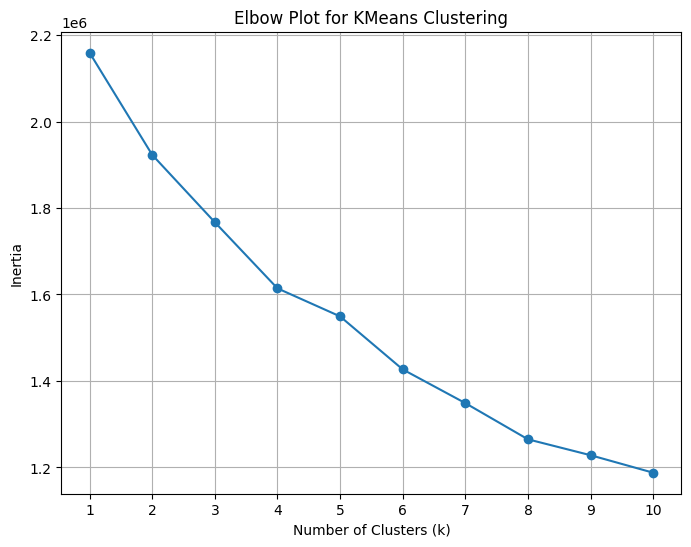

In [112]:
# Define the range of k (from 1 to 10)
k_range = range(1, 11)

# Initialize a list to store the inertia values for each k
inertia_values = []

# Perform KMeans clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(digits.data)  # Assuming digits_data is your dataset
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Plot for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)  # Show every k value
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):
Kmeans ALL By using all available pixels, the algorithm has the richest possible information for distinguishing between different digits.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [ ]:
#already done above

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

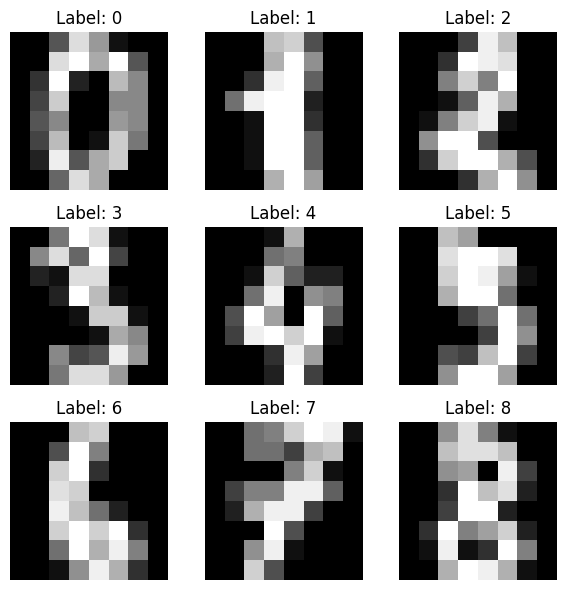

In [88]:
# Plot some of the observations
plt.figure(figsize=(6, 6))

# plot first 9 images
for i in range(9):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {labels[i]}")  # Add the label in the title
    plt.axis('off')  # Hide the axis
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [100]:
from sklearn.model_selection import train_test_split # For classification


In [101]:
X = digits.data  # Features (8x8 flattened pixels)
y = digits.target  # Target labels (digits from 0 to 9)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [104]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [105]:
# Classifier ALL
svm_all = SVC()

# Train the classifier on the entire feature set
svm_all.fit(X_train, y_train)

# Predict on the test set
y_pred_all = svm_all.predict(X_test)

# Calculate accuracy
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy with all features: {accuracy_all:.4f}")

Accuracy with all features: 0.9861


In [106]:
# Classifier 1 col
# Select only the first column (first 8 pixels/variables)
X_train_1col = X_train[:, :1]  # First column (only the first feature of each row)
X_test_1col = X_test[:, :1]

# Initialize and train the SVM classifier
svm_1col = SVC()
svm_1col.fit(X_train_1col, y_train)

# Predict on the test set
y_pred_1col = svm_1col.predict(X_test_1col)

# Calculate accuracy
accuracy_1col = accuracy_score(y_test, y_pred_1col)
print(f"Accuracy with the first column: {accuracy_1col:.4f}")

Accuracy with the first column: 0.0778


5) Make predictions (use the test set)

In [107]:
# Classifier 4 col
# Select only the fourth column (fourth 8 pixels/variables)
X_train_4col = X_train[:, 3:4]  # Fourth column (4th feature of each row)
X_test_4col = X_test[:, 3:4]

# Initialize and train the SVM classifier
svm_4col = SVC()
svm_4col.fit(X_train_4col, y_train)

# Predict on the test set
y_pred_4col = svm_4col.predict(X_test_4col)

# Calculate accuracy
accuracy_4col = accuracy_score(y_test, y_pred_4col)
print(f"Accuracy with the fourth column: {accuracy_4col:.4f}")

Accuracy with the fourth column: 0.1833


6) Compute performance metrics

In [108]:
# classifier 8 col
# Select only the eighth column (eighth 8 pixels/variables)
X_train_8col = X_train[:, 7:8]  # Eighth column (8th feature of each row)
X_test_8col = X_test[:, 7:8]

# Initialize and train the SVM classifier
svm_8col = SVC()
svm_8col.fit(X_train_8col, y_train)

# Predict on the test set
y_pred_8col = svm_8col.predict(X_test_8col)

# Calculate accuracy
accuracy_8col = accuracy_score(y_test, y_pred_8col)
print(f"Accuracy with the eighth column: {accuracy_8col:.4f}")


Accuracy with the eighth column: 0.0889


7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

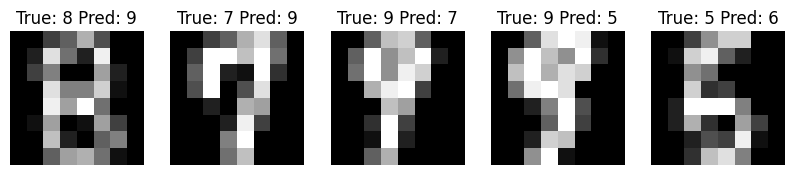

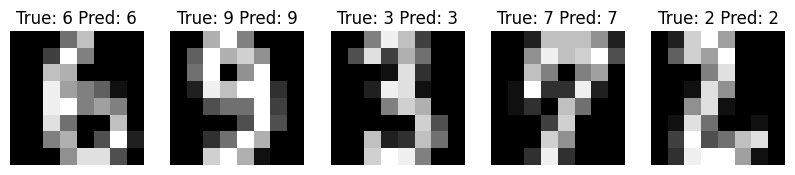

In [111]:
"""
    Plots several digits from the test set and compares the true label with the predicted label.
    
    Args:
    - X_test: Test features (flattened 8x8 digit images).
    - y_test: True labels.
    - y_pred: Predicted labels.
    - num_images: Number of images to plot.
"""

def plot_digits(X_test, y_test, y_pred, num_images=5):
    plt.figure(figsize=(10, 10))
    count = 0
    for i in range(len(y_test)):
        if count >= num_images:
            break
        if y_test[i] != y_pred[i]:  # If the predicted label differs from the true label
            plt.subplot(1, num_images, count + 1)
            plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
            plt.title(f"True: {y_test[i]} Pred: {y_pred[i]}")
            plt.axis('off')
            count += 1
    plt.show()

# Use the predictions from the classifier trained on all features (ClassifierAll)
plot_digits(X_test, y_test, y_pred_all, num_images=5)

"""
    Plots several correctly classified digits from the test set.
    
    Args:
    - X_test: Test features (flattened 8x8 digit images).
    - y_test: True labels.
    - y_pred: Predicted labels.
    - num_images: Number of images to plot.
"""
def plot_correct_digits(X_test, y_test, y_pred, num_images=5):

    plt.figure(figsize=(10, 10))
    count = 0
    for i in range(len(y_test)):
        if count >= num_images:
            break
        if y_test[i] == y_pred[i]:  # If the predicted label is correct
            plt.subplot(1, num_images, count + 1)
            plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
            plt.title(f"True: {y_test[i]} Pred: {y_pred[i]}")
            plt.axis('off')
            count += 1
    plt.show()

# Plot correctly classified digits for ClassifierAll
plot_correct_digits(X_test, y_test, y_pred_all, num_images=5)

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

The ClassifierAll was much better because it took into consideration every example when training the model

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Considero que tengo un nivel deseable de poder manipular, entender y graficar cantidades importantes de datos, con conocimiento suficiente de las librerías necesarias de python, y un buen entendimiento de los modelos vistos para machine learning, predicción de outcomes y clasificación